In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Titanic_original.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
features_missingvalue = data[data.isnull().any(axis=1)]

In [8]:
features_missingvalue.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
df = data.fillna(0)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [11]:
# 2. Define Survived column as TARGET variable

target = df['Survived']

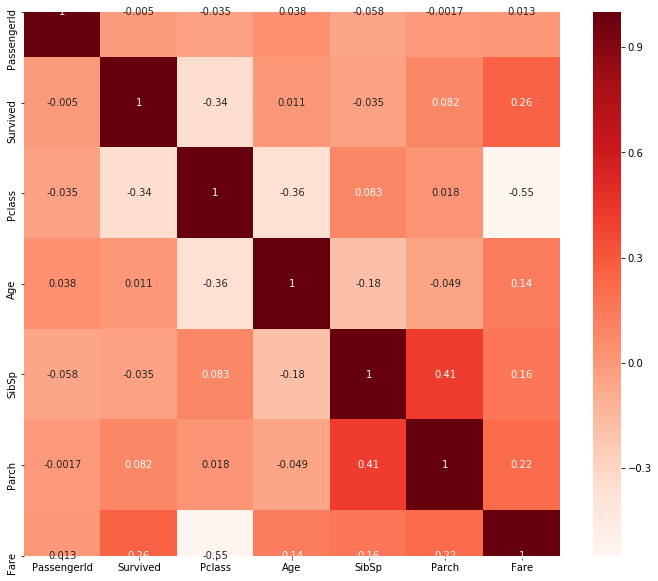

In [12]:
# 3. Select features that can be predictive of the survival status
# 4. Drop features that you think are not predictive and explain why they are being dropped

plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
# Coorelation with target variable

cor_target = abs(cor["Survived"])

#Selecting highly correlated features

relevant_features = cor_target[cor_target>0]
relevant_features

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Age            0.010539
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [14]:
df1 = df.drop(["PassengerId","Pclass","Name","Ticket","Embarked","Cabin", "Fare", "Sex"], axis=1)

In [15]:
df1.head()

,Survived,Age,SibSp,Parch
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [16]:
df_dummies = pd.get_dummies(df1, columns = ["Survived", "SibSp", "Parch", "Age"])

In [17]:
df_dummies.head()

,Survived_0,Survived_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df2 = pd.concat([df1, df_dummies], axis=1)

In [34]:
df2.head()

,Survived,Age,SibSp,Parch,Survived_0,Survived_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,0,22.0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# 6. Import logistic regression function, train and test function from sklearn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
# 7. Apply logistic regression on the split train/test dataset

X = df2.drop(["Survived"],axis=1)
Y = df2["Survived"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\harpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

C:\Users\harpr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\harpr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [ ]:
# 5. Investigate the difference between L1 and L2 for the outcome. Is there a difference?

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [51]:
# Training the model and calculating score for Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train, y_train)

pred = ridgeReg.predict(X_test)

In [52]:
ridgeReg.score(X_test, y_test)

0.9989898664577826

In [54]:
# Training the model and calculating score for Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train, y_train)

pred = lassoReg.predict(X_test)

lassoReg.score(X_test, y_test)

-0.014435988998570348

# There was a difference in Ridge and Lasso score.
Ridge = 0.998989866
Lasso = -0.014435988

In [55]:
# 6. Investigate the results of using different cross validation values

In [73]:
from sklearn.model_selection import KFold

In [74]:
kf = KFold(n_splits=2)
for train, test in kf.split(df2):
    print("%s %s" % (X_train, X_test))

      Age  SibSp  Parch  Survived_0  Survived_1  SibSp_0  SibSp_1  SibSp_2  \
520  30.0      0      0           0           1        1        0        0   
510  29.0      0      0           0           1        1        0        0   
446  13.0      0      1           0           1        1        0        0   
2    26.0      0      0           0           1        1        0        0   
691   4.0      0      1           0           1        1        0        0   
..    ...    ...    ...         ...         ...      ...      ...      ...   
575  19.0      0      0           1           0        1        0        0   
838  32.0      0      0           0           1        1        0        0   
337  41.0      0      0           0           1        1        0        0   
523  44.0      0      1           0           1        1        0        0   
863   0.0      8      2           1           0        0        0        0   

     SibSp_3  SibSp_4  ...  Age_62.0  Age_63.0  Age_64.0  Age_6

In [75]:
# 7. For the different investigation procedures, plot the accuracy outcome compared to the different parameters. 
# For example, Accuracy VS. the value of C.